# Obter dados

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X, y = boston.data, boston.target

In [4]:
X.shape, y.shape

((506, 13), (506,))

0


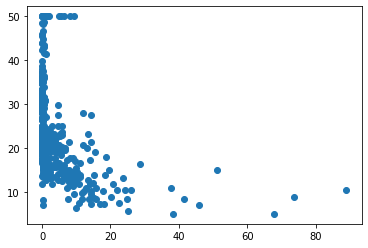

1


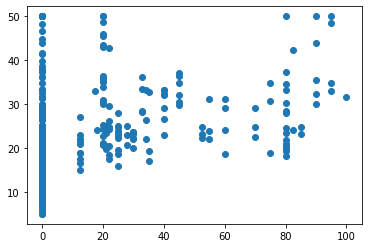

2


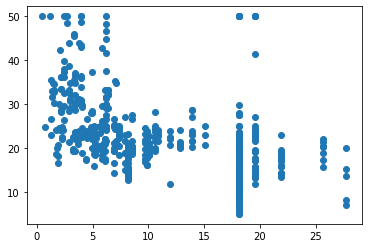

3


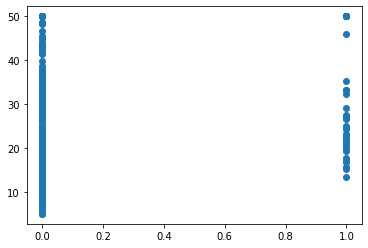

4


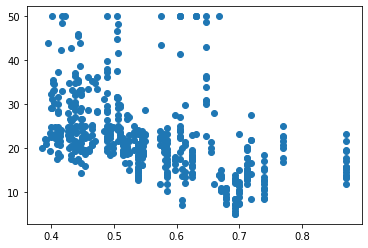

5


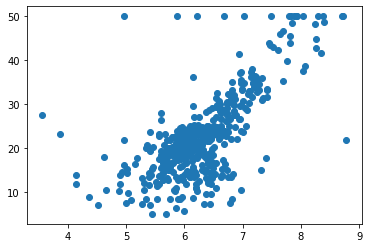

6


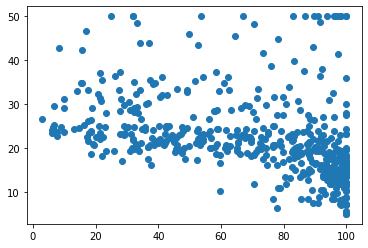

7


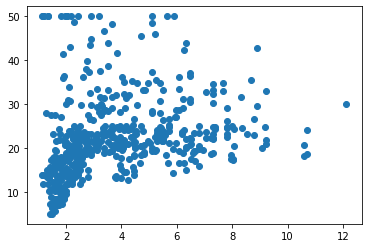

8


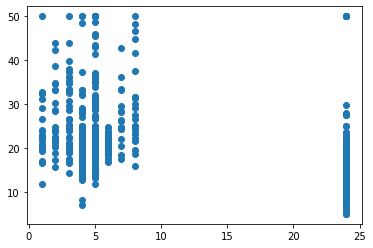

9


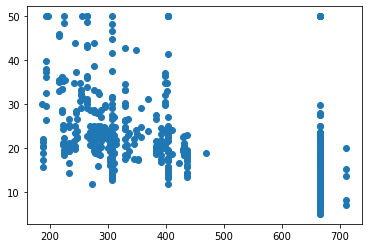

10


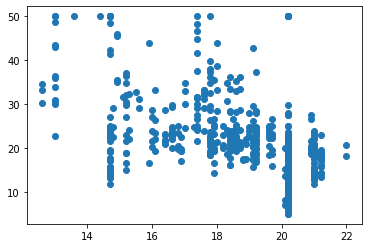

11


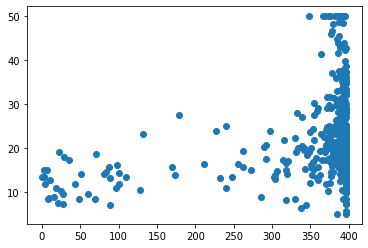

12


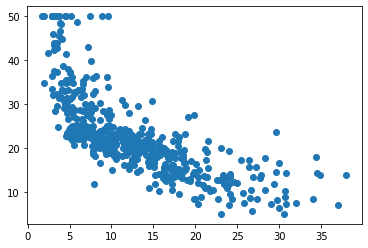

In [5]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

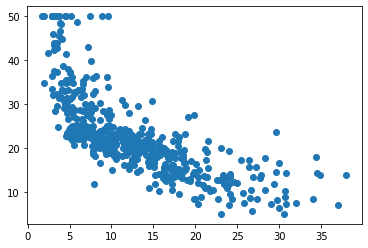

In [6]:
plt.scatter(X[:,12],y)

# Solução

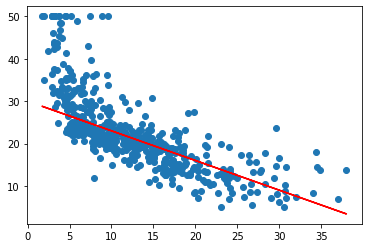

In [7]:
def modelo(x, a, b):
    y = a*x + b
    return y
x = X[:,12]
ypred = modelo(x, -0.7, 30)
plt.scatter(x, y)
plt.plot(x, ypred, 'r')
plt.show()

# Métrica de avaliação

In [8]:
from math import sqrt

def rmse(y, ypred):
    yDiff = ypred - y
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)

In [9]:
ypred = modelo(x, -1, 40)
rmse(y, ypred)

7.860394580708203

In [10]:
ypred = modelo(x, -0.7, 30)
rmse(y, ypred)

6.602806949970377

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)

rmse(y, ypred)

6.602806949970374

# Método de aprendizado

In [12]:
class regressao_linear:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def predict(self, x):
        y = self.a*x + self.b
        return y

modelo_rl = regressao_linear(-0.7, 30)
ypred = modelo_rl.predict(x)
rmse(y, ypred)

6.602806949970374

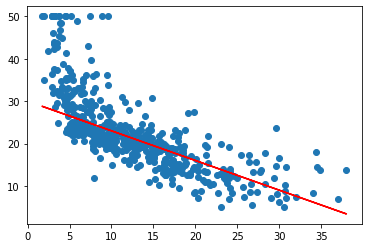

In [13]:
plt.scatter(x, y)
plt.plot(x, ypred, 'r')
plt.show()

# Ajuste automático

rmse inicial: 7.860394580708203
rmse final: 6.208490175215666


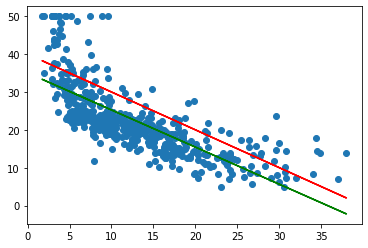

In [14]:
def rms(array):
    return sum(array**2)/len(array)

class regressao_linear:
    def __init__(self):
        self.a = -1
        self.b = 40

    def fit(self, x, y):
        for _ in range(100):
            ypred = self.predict(x)
            erro = ypred - y
            # mse = rms(erro)
            # print(mse) 
            ajusteA = sum([erro[i]*x[i] for i in range(len(x))])/sum(x)
            self.a = self.a - 0.1*ajusteA
            ajusteB = sum([erro[i] for i in range(len(erro))])/len(erro)
            self.b = self.b - 0.1*ajusteB

    def predict(self, x):
        y = self.a*x + self.b
        return y

modelo_rl = regressao_linear()
plt.scatter(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse inicial: {erro}")
plt.plot(x, ypred, 'r')

modelo_rl.fit(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(x, ypred, 'g')

plt.show()


# Limpando o modelo

rmse final: 6.20346413142642


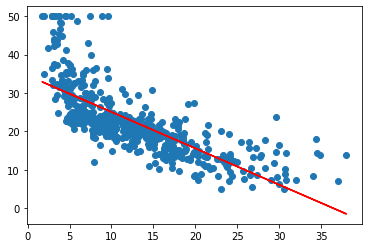

In [16]:
import numpy as np

class regressao_linear:
    def __init__(self):
        self.w = None

    def fit(self, x, y):
        self.w = np.random.rand(2,1)
        for _ in range(1000):
            ypred = self.predict(x)
            erro = ypred - y
            ajusteA = np.array(x).T.dot(erro)/sum(x)
            self.w[1] = self.w[1] - 0.1*ajusteA
            ajusteB = np.mean(erro)
            self.w[0] = self.w[0] - 0.1*ajusteB

    def predict(self, x):
        y = self.w[1]*x + self.w[0]
        return y

modelo_rl = regressao_linear()
plt.scatter(x, y)

modelo_rl.fit(x, y)

ypred = modelo_rl.predict(x)
erro = rmse(y, ypred)
print(f"rmse final: {erro}")
plt.plot(x, ypred, 'r')

plt.show()
